In [11]:
# -*- coding: utf-8 -*-
"""
@Author: Jiayi Chen
Created on Nov. 21, 2023
Last modified on Nov. 27, 2023

Verify when does the central limit theorem hold for the Poisson distribution.
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from scipy.stats import chi2
%matplotlib widget

## Poisson distribution and normal distribution

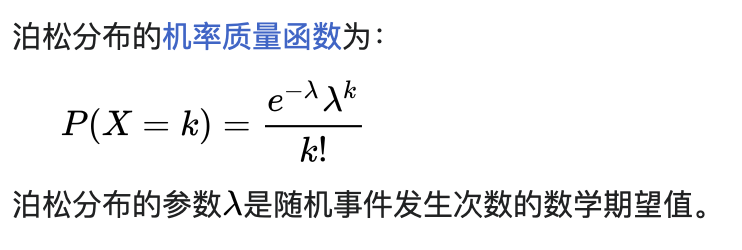

In [8]:
Image("/Users/joey/Documents/Codes/Chandra/poisson_distribution.png", width=500)

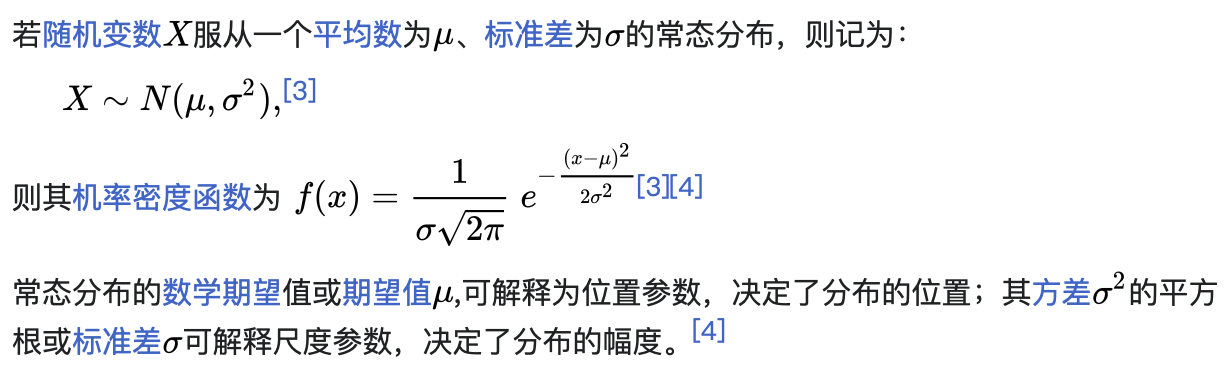

In [9]:
Image("/Users/joey/Documents/Codes/Chandra/normal_distribution.png", width=800)

/var/folders/jc/gxyqx23s6nv7n2znb663qk5r0000gn/T/ipykernel_50513/3086583718.py:5: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  y1=np.exp(-lamb)*lamb**x/np.math.factorial(x)


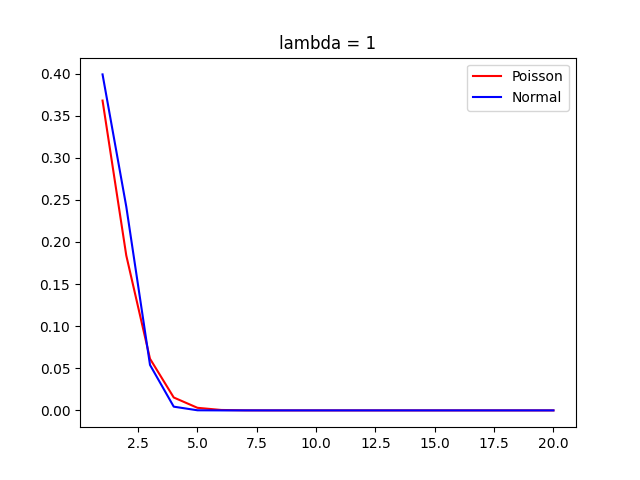

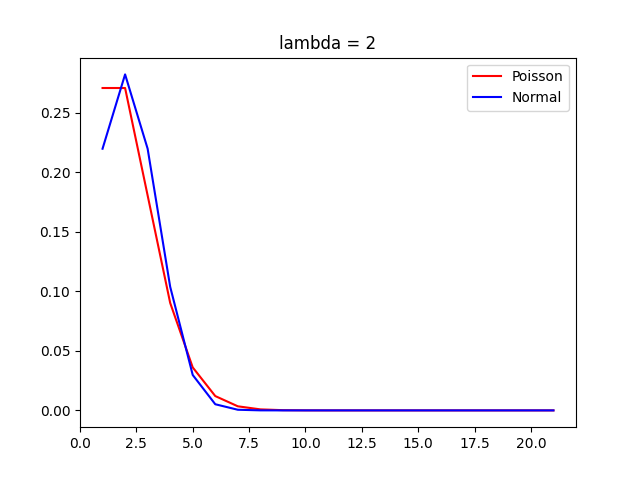

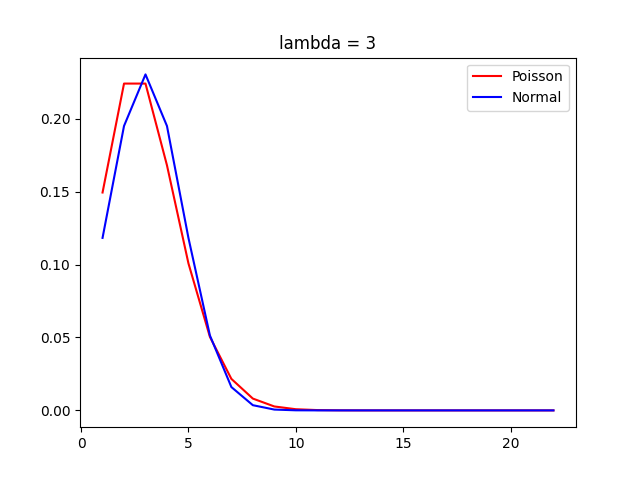

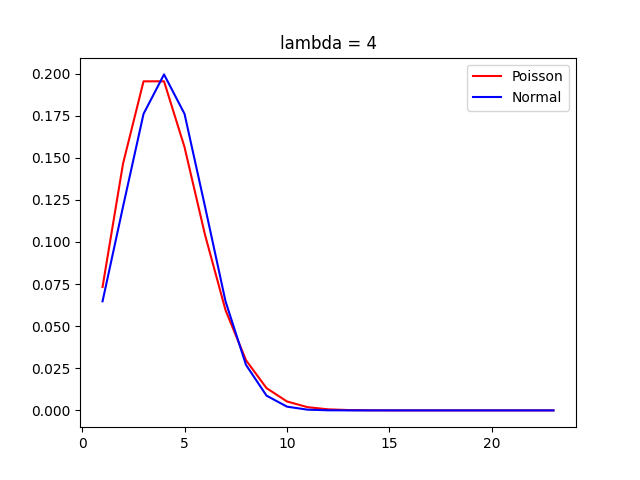

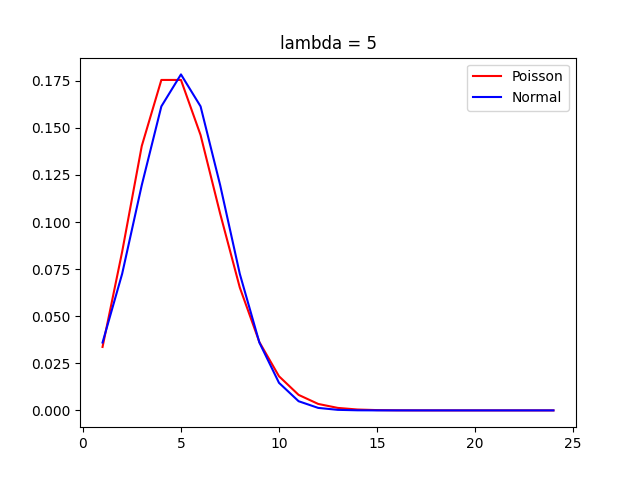

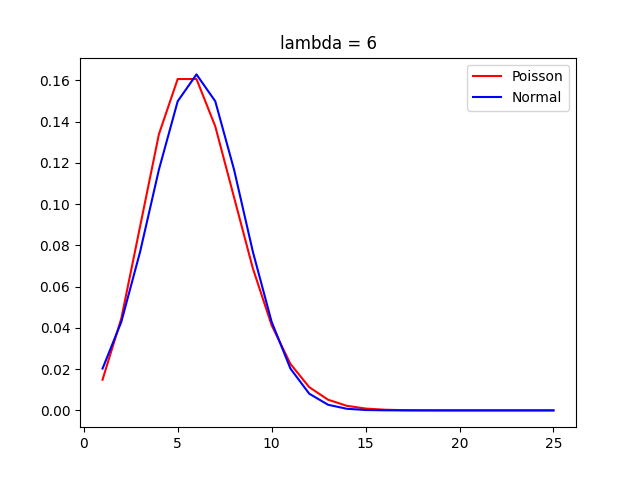

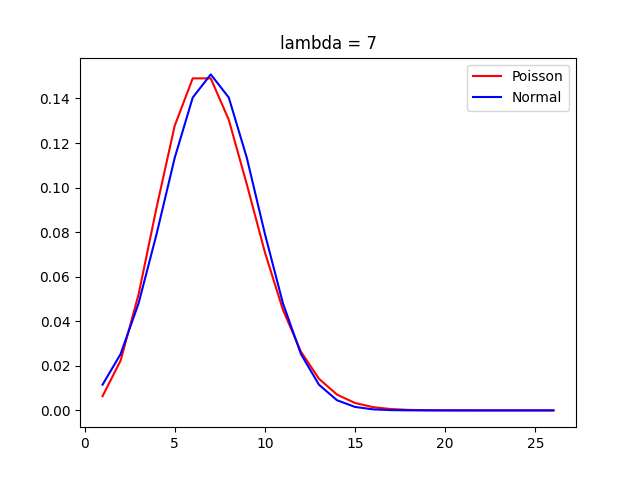

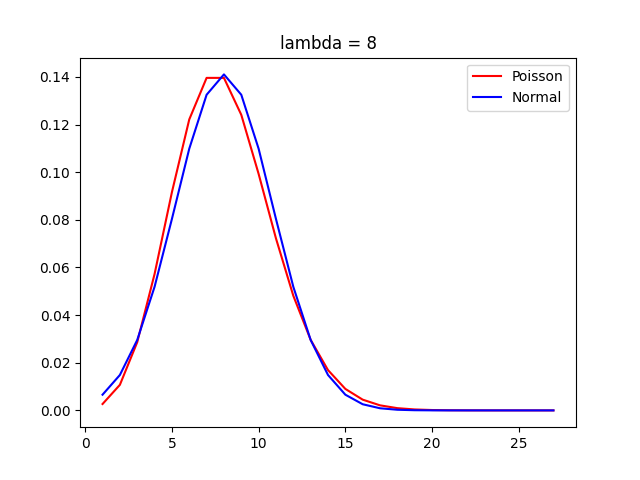

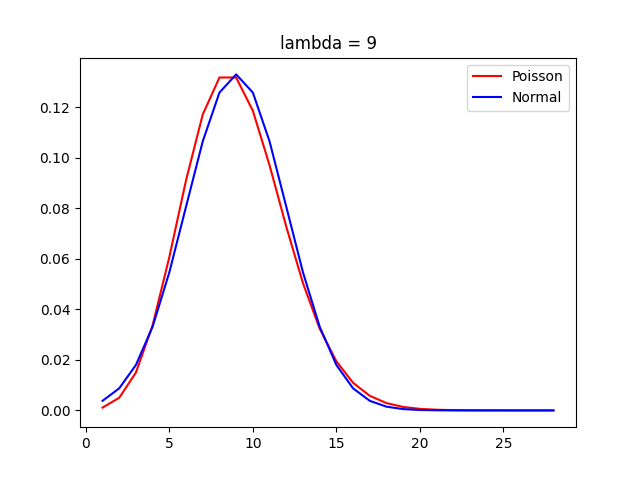

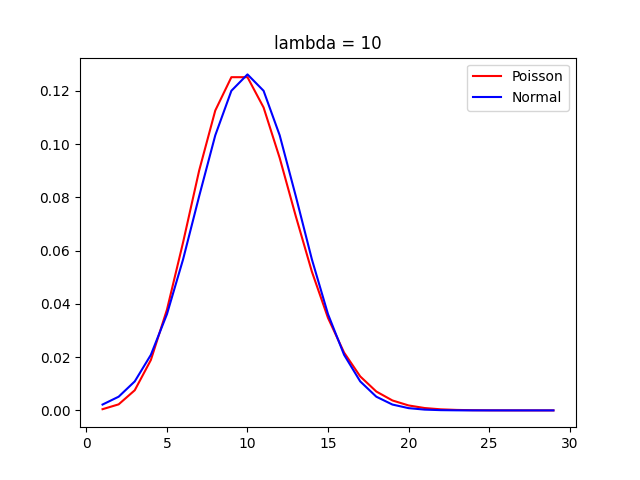

10


In [10]:
for lamb in range(1,31):
    p1=[]
    p2=[]
    for x in range(1,lamb+20):
        y1=np.exp(-lamb)*lamb**x/np.math.factorial(x)
        p1.append(y1)
        y2=np.exp(-(x-lamb)**2/2/lamb)/np.sqrt(2*np.pi*lamb)
        p2.append(y2)
    plt.figure()
    plt.plot(range(1,lamb+20),p1,'r',label='Poisson')
    plt.plot(range(1,lamb+20),p2,'b',label='Normal')
    plt.title('lambda = '+str(lamb))
    plt.legend()
    plt.show()
    plt.savefig('lambda = '+str(lamb)+'.png')
    result = [a - b for a, b in zip(p1, p2)]
    if all(i < 0.01 for i in result):
        print(lamb)
        break

## Chi-square distribution

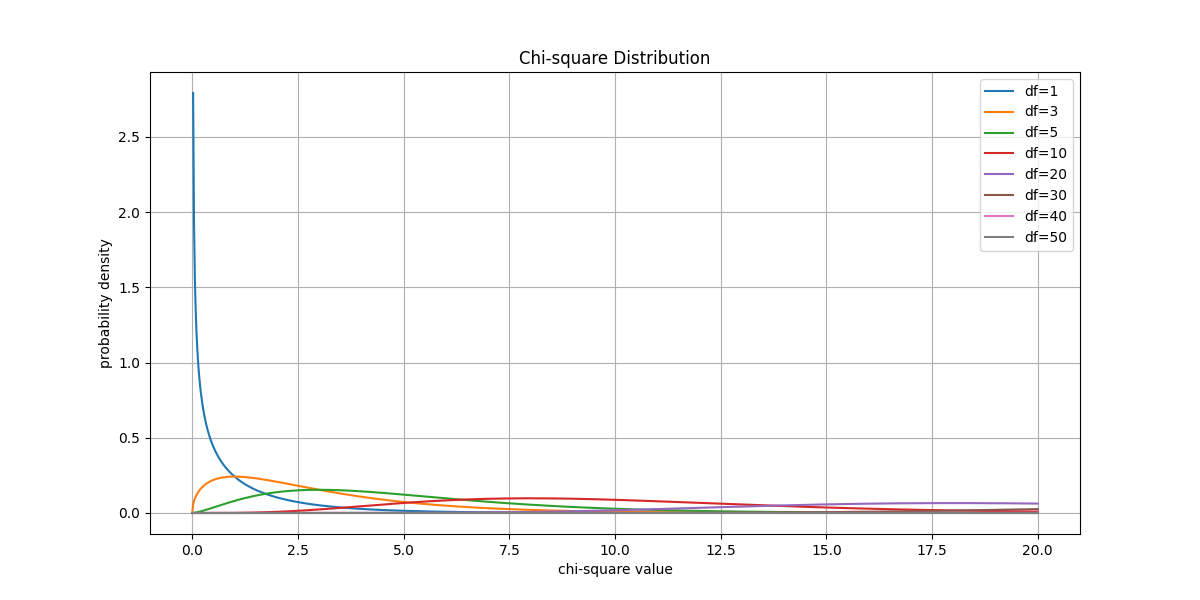

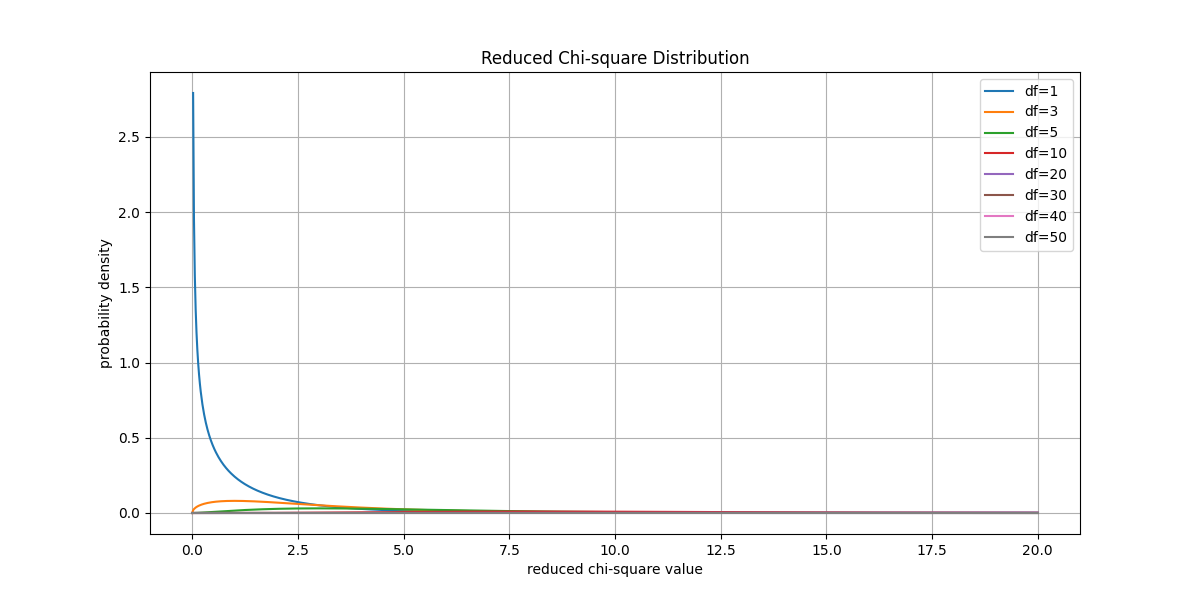

In [34]:
# 定义自由度
df = [1, 3, 5, 10, 20, 30, 40, 50]

# 定义x轴的范围
x = np.linspace(0, 20, 1000)

# 绘制卡方分布
plt.figure(figsize=(12, 6))
for d in df:
    plt.plot(x, chi2.pdf(x, d), label=f'df={d}')
plt.title('Chi-square Distribution')
plt.xlabel('chi-square value')
plt.ylabel('probability density')
plt.legend()
plt.grid(True)
plt.show()

# 绘制归一化卡方分布
plt.figure(figsize=(12, 6))
for d in df:
    plt.plot(x, chi2.pdf(x, d) / d, label=f'df={d}')
plt.title('Reduced Chi-square Distribution')
plt.xlabel('reduced chi-square value')
plt.ylabel('probability density')
plt.legend()
plt.grid(True)
plt.show()

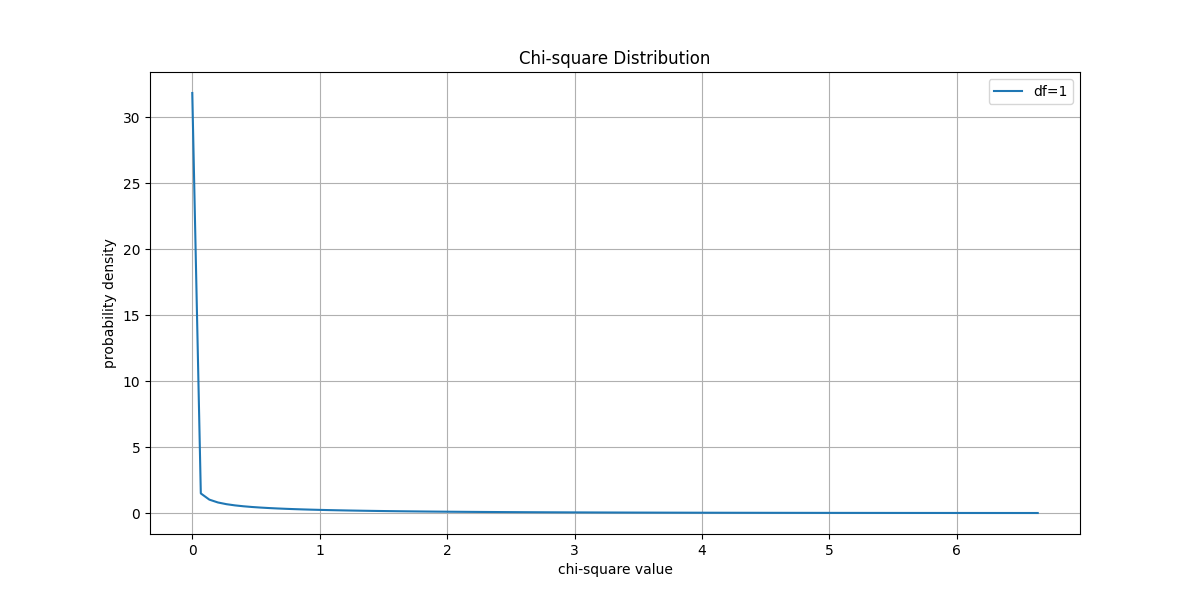

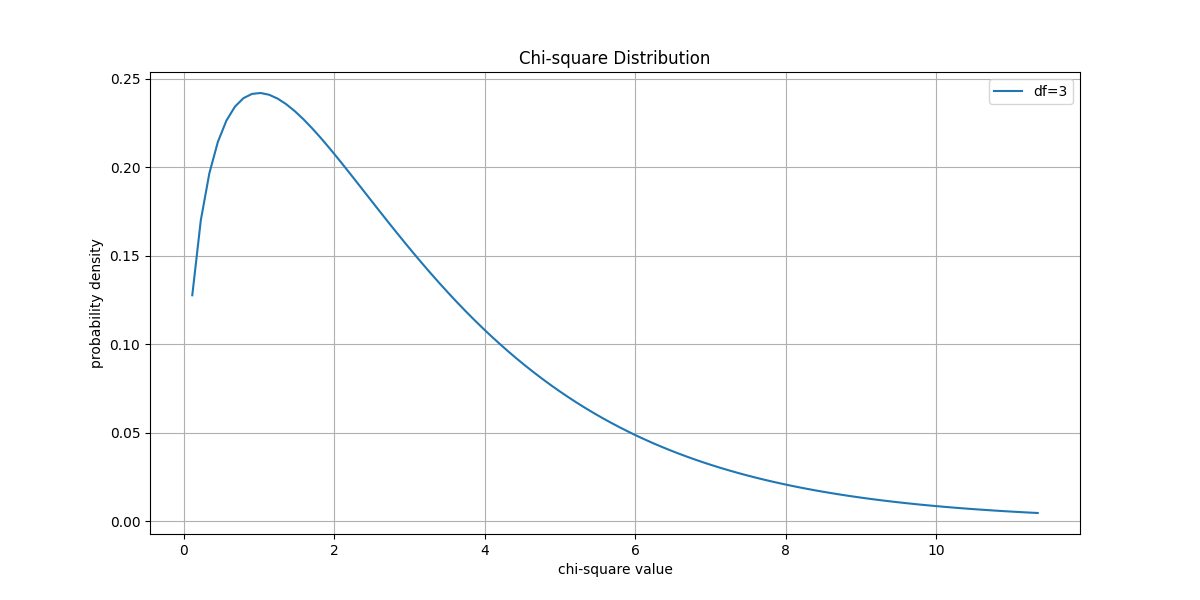

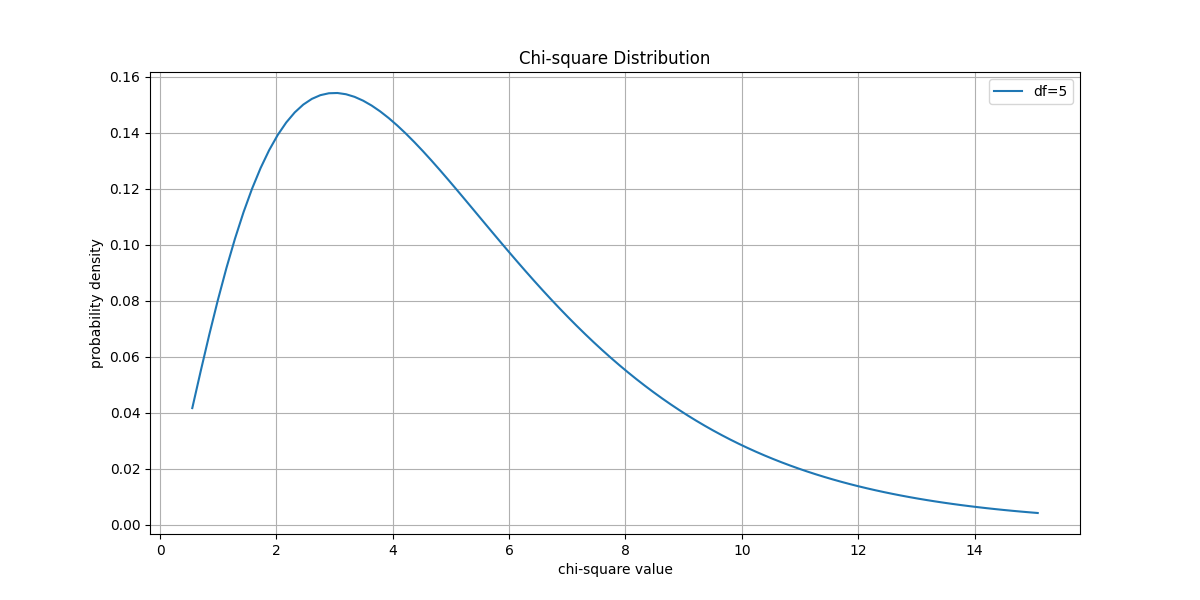

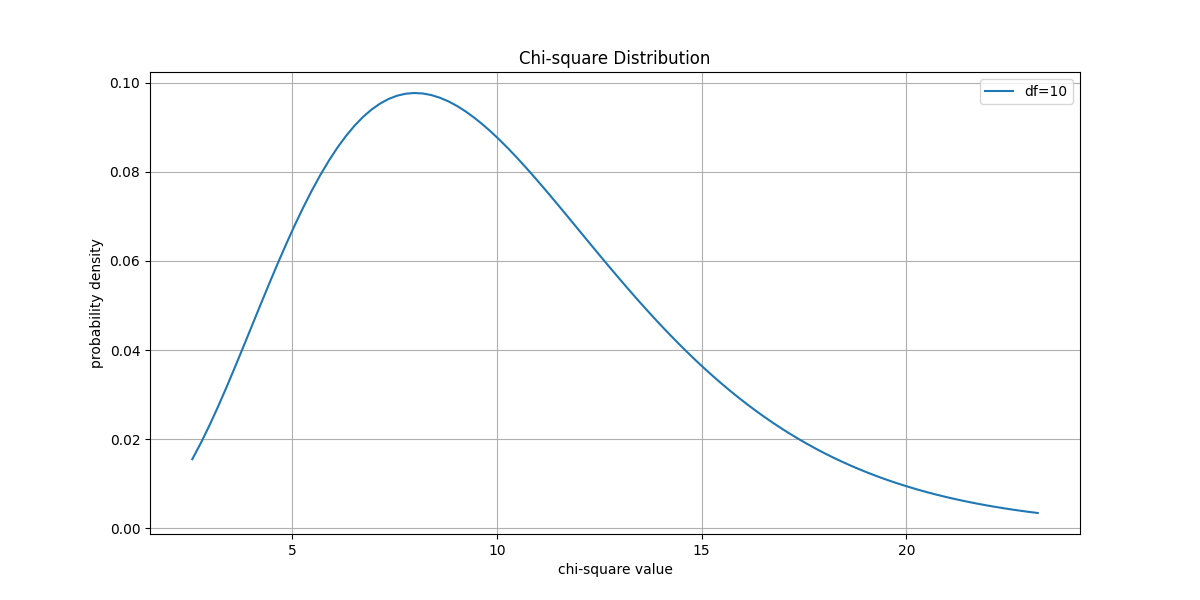

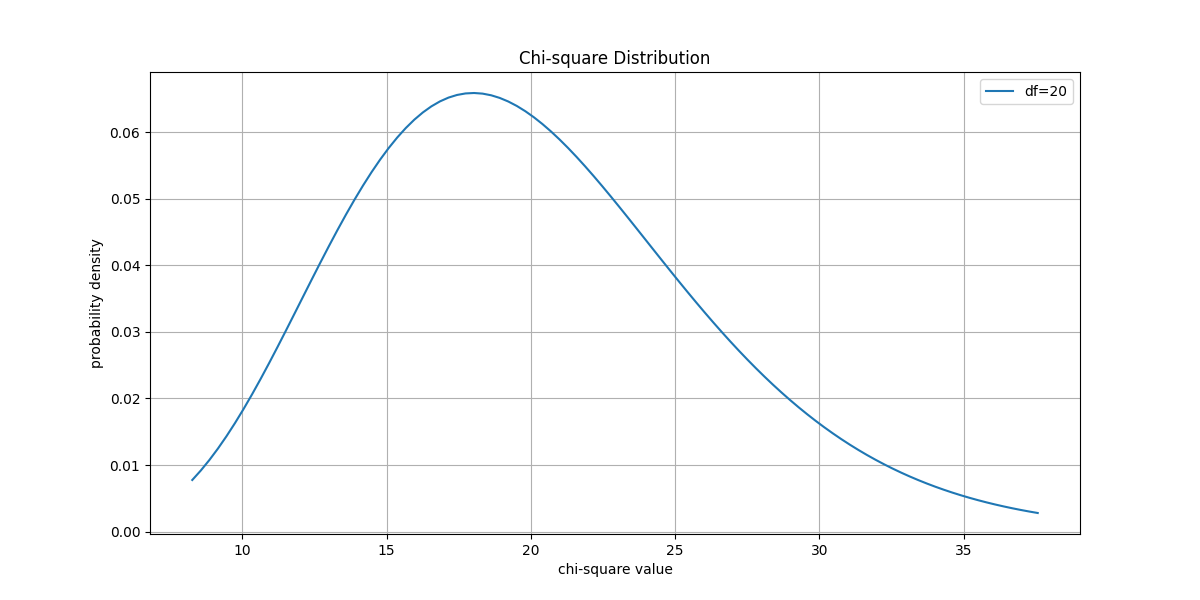

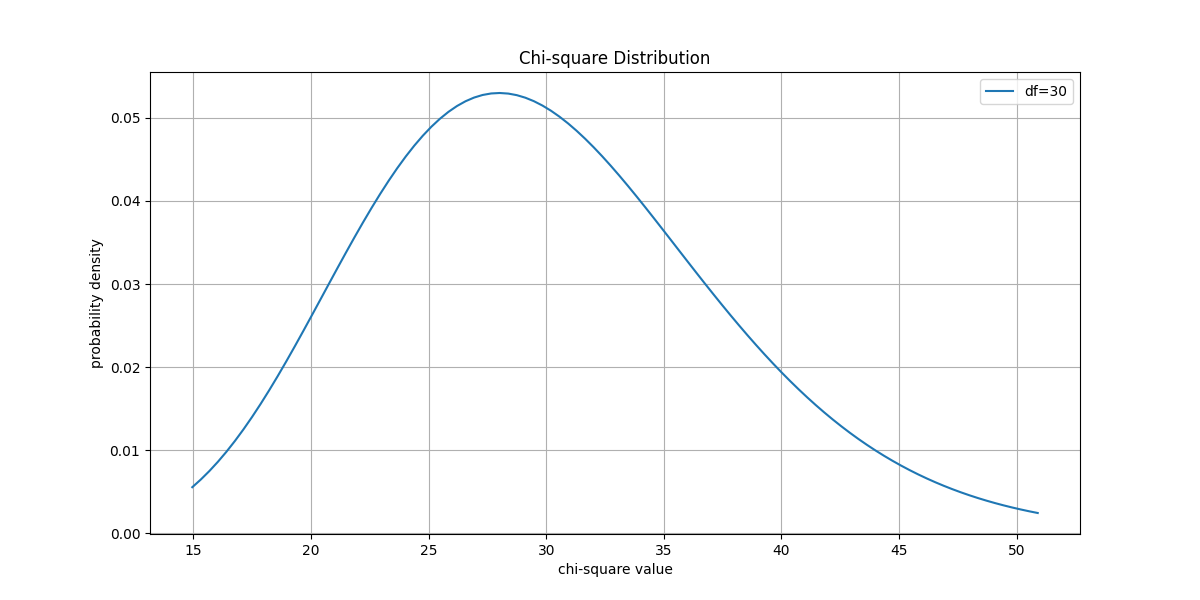

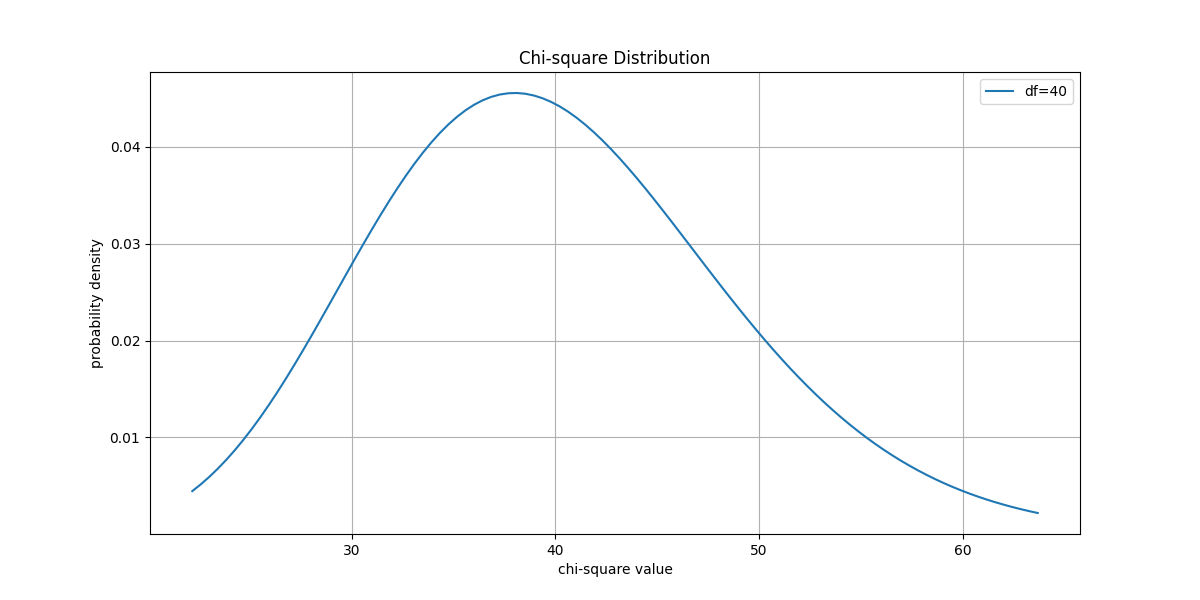

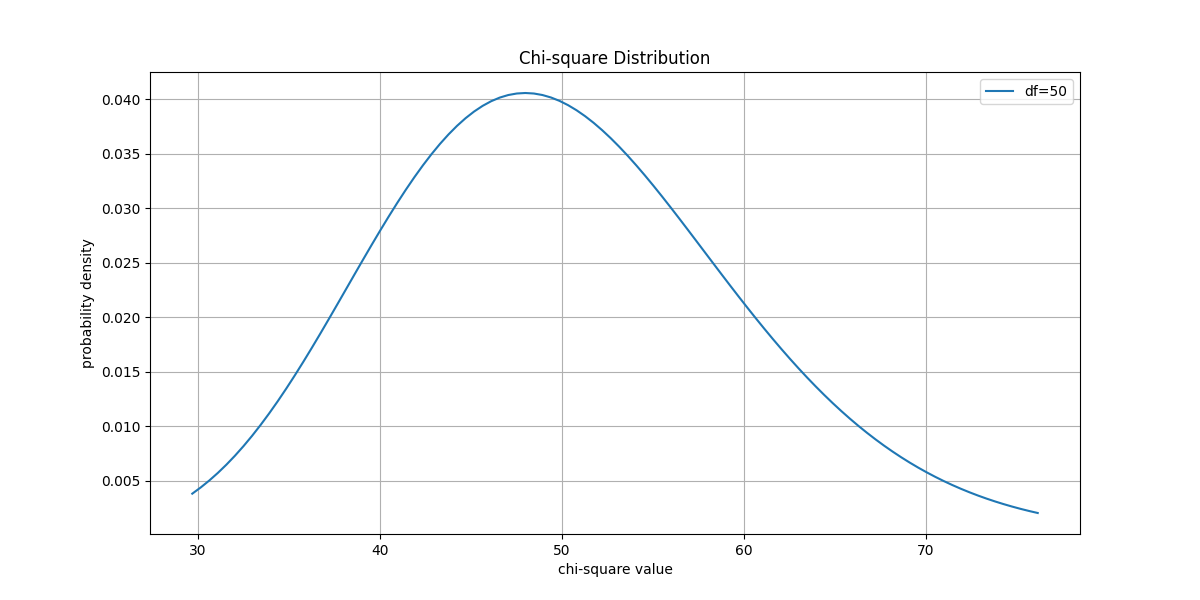

In [37]:
# 定义自由度
df = [1, 3, 5, 10, 20, 30, 40, 50]

for d in df:
    # 定义x轴的范围
    x = np.linspace(chi2.ppf(0.01, d), chi2.ppf(0.99, d), 100)

    # 计算卡方分布的概率密度函数
    y = chi2.pdf(x, d)

    # 绘制卡方分布
    plt.figure(figsize=(12, 6))
    plt.plot(x, y, label=f'df={d}')
    plt.title('Chi-square Distribution')
    plt.xlabel('chi-square value')
    plt.ylabel('probability density')
    plt.legend()
    plt.grid(True)
    plt.show()

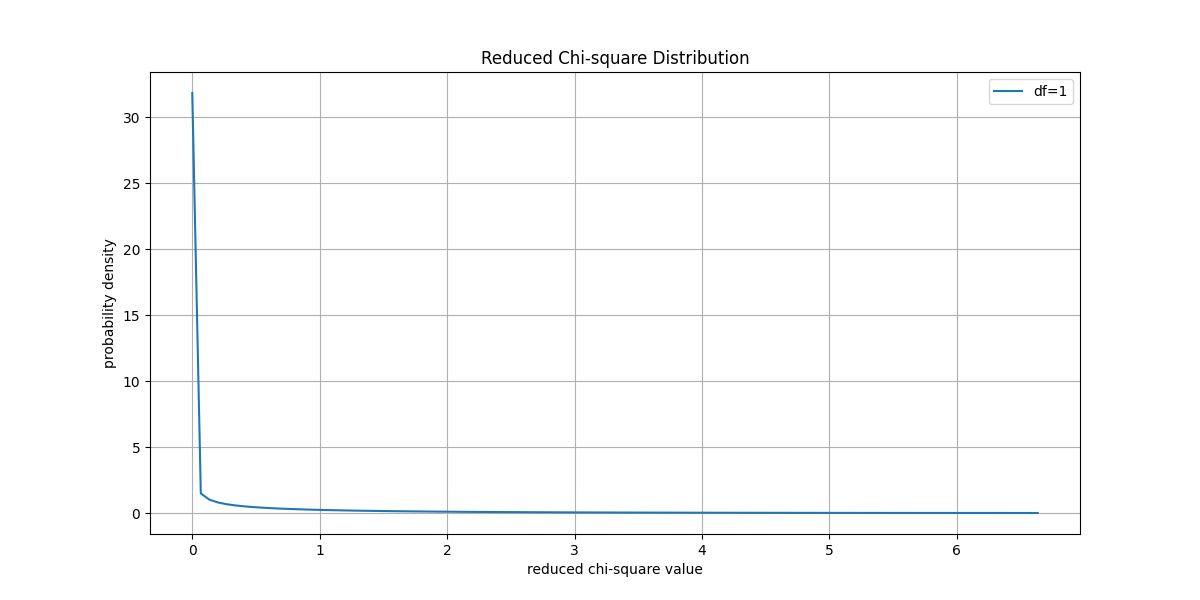

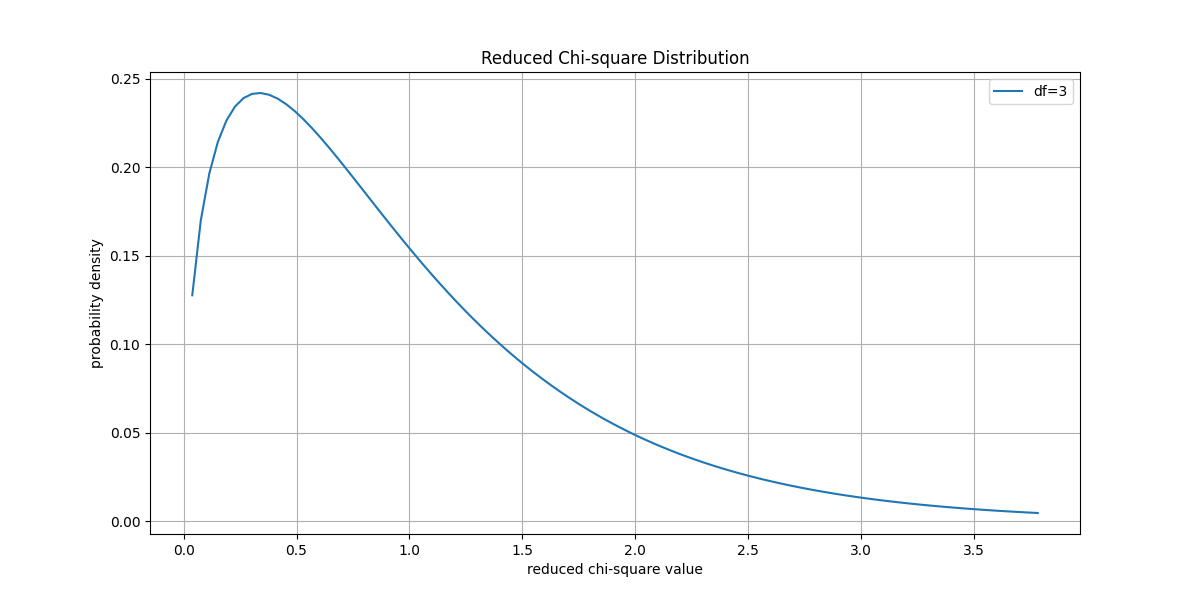

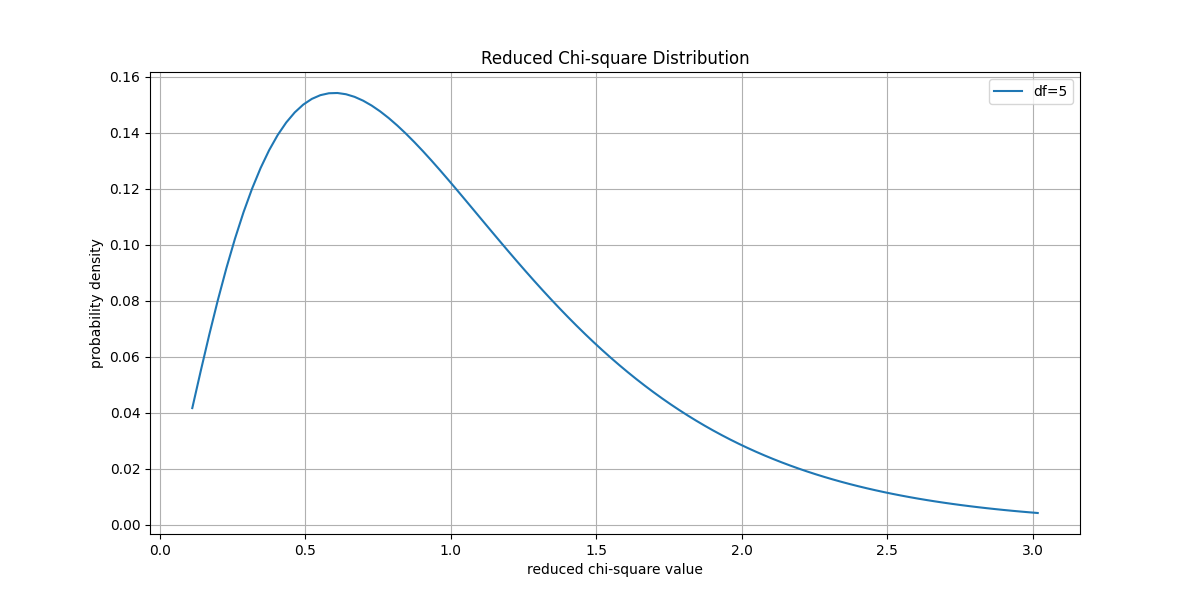

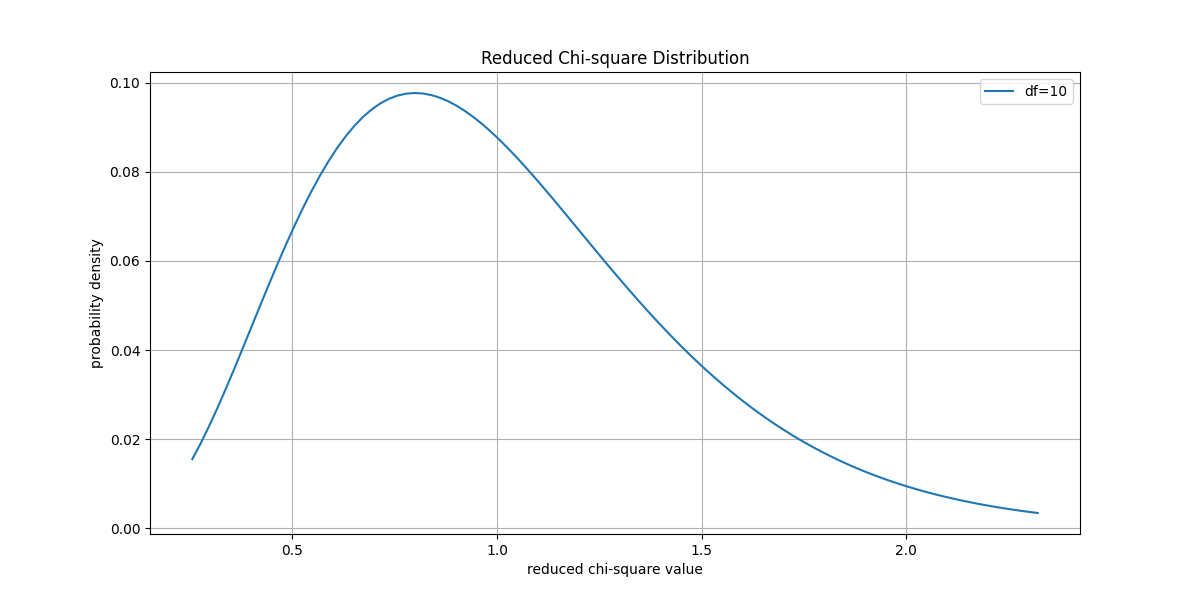

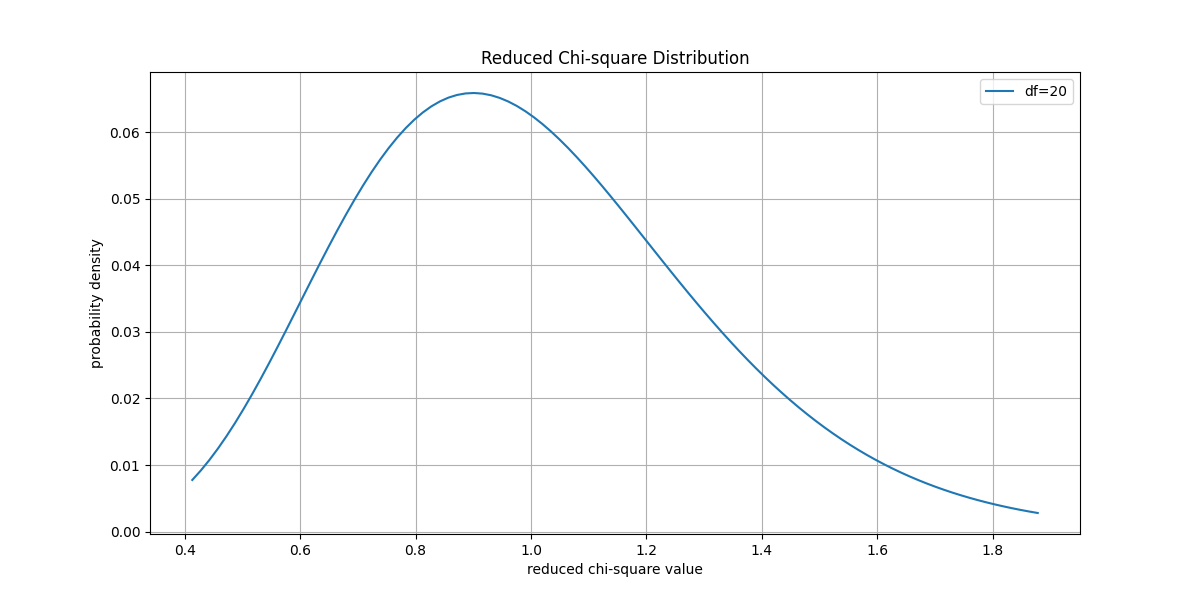

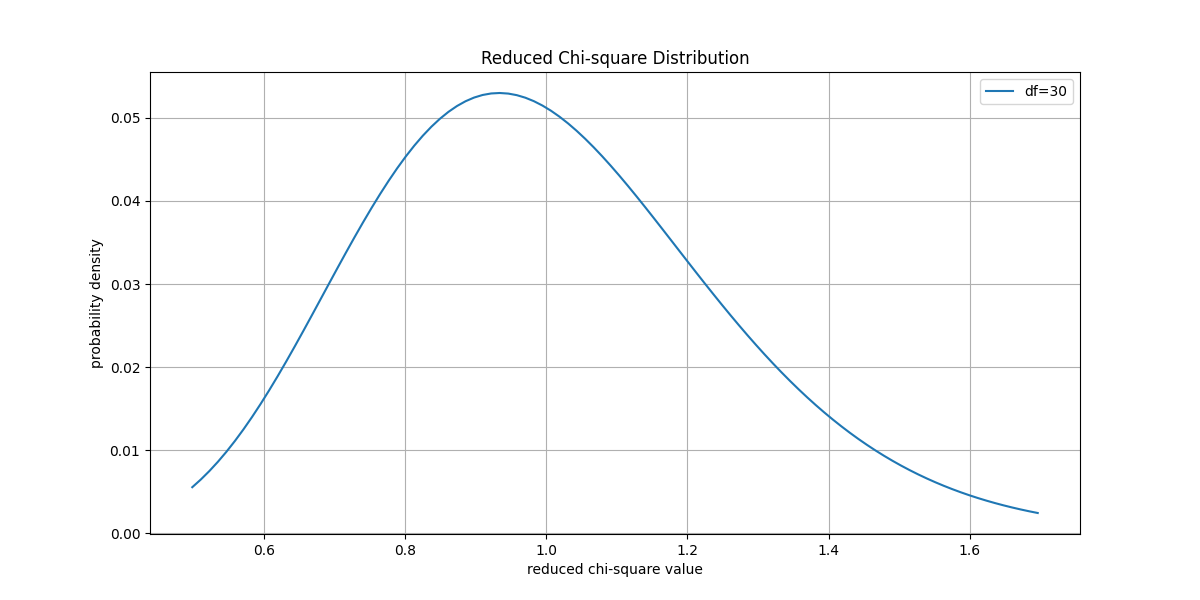

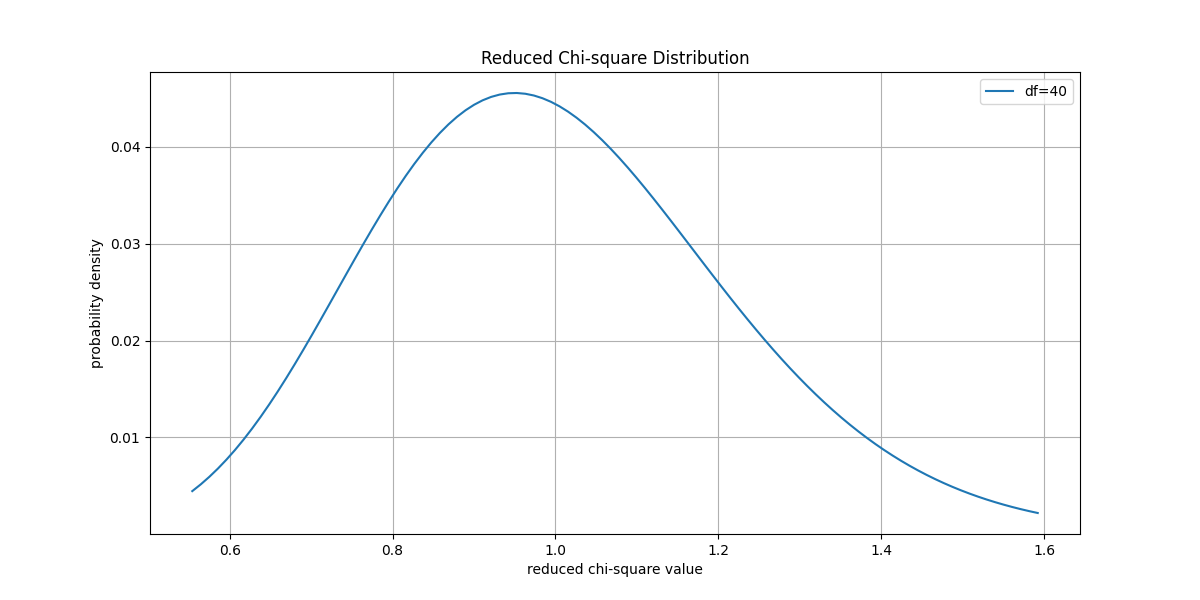

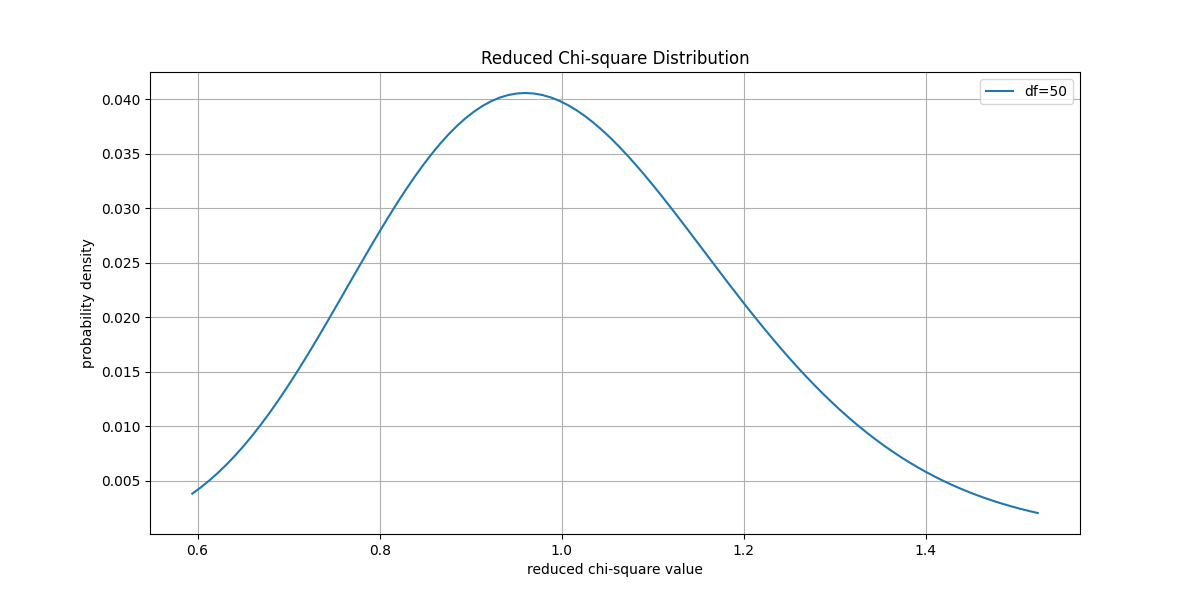

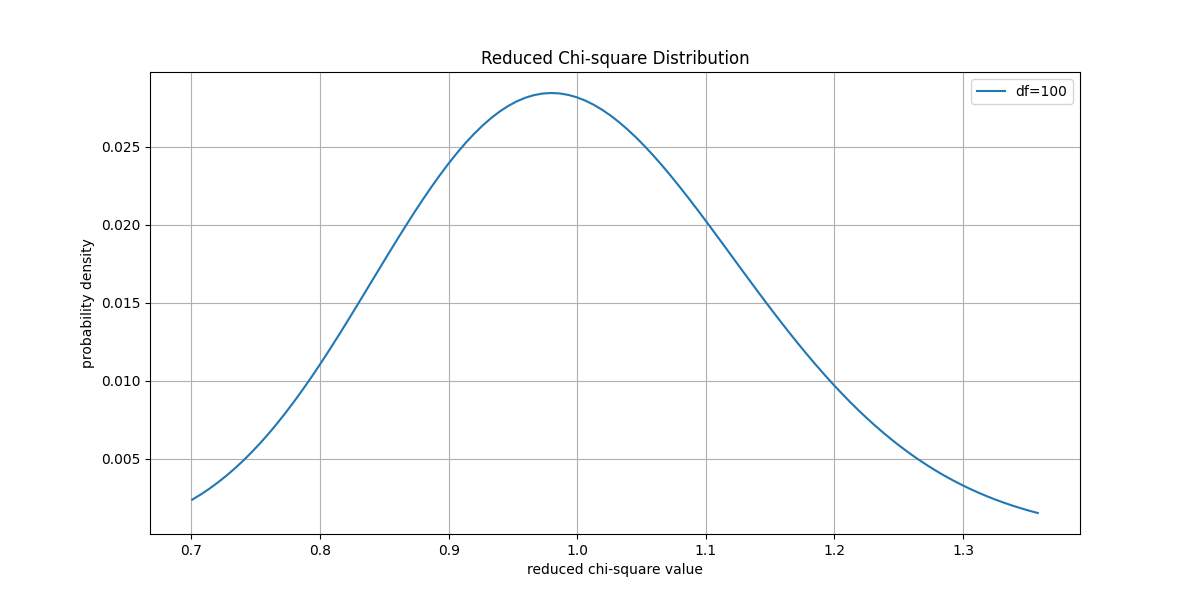

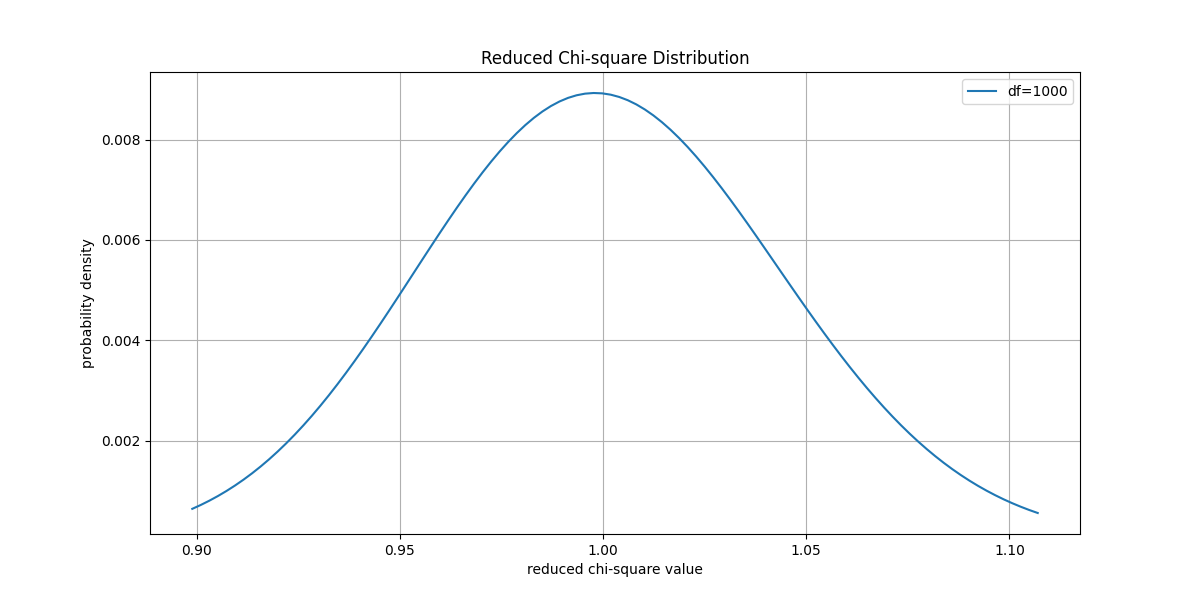

In [42]:
# 定义自由度
df = [1, 3, 5, 10, 20, 30, 40, 50, 100, 1000]

for d in df:
    # 定义x轴的范围
    x = np.linspace(chi2.ppf(0.01, d), chi2.ppf(0.99, d), 100)

    # 计算卡方分布的概率密度函数
    y = chi2.pdf(x, d)

    # 绘制卡方分布
    plt.figure(figsize=(12, 6))
    plt.plot(x/d, y, label=f'df={d}')
    plt.title('Reduced Chi-square Distribution')
    plt.xlabel('reduced chi-square value')
    plt.ylabel('probability density')
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.savefig('Reduced_Chi_square Distribution/df='+str(d)+'.png')